In [1]:
import json
import pandas as pd
import os 
import en_core_web_md
import numpy as np

In [2]:
def obtain_sentences(dataset):
    f = json.load(open(dataset, 'r'))
    df = pd.DataFrame(f)
    sentences = list(df['question']) 
    return sentences

In [ ]:
import spacy
import numpy as np
from scipy.spatial.distance import cosine
import spacy
from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_md")

# 2. Define a small curated seed list for each concept
seed_terms = {
    "ethics":       [
                        "autonomy",
                        "beneficence",
                        "non-maleficence",
                        "justice",
                        "informed consent",
                        "patient confidentiality",
                        "privacy",
                        "clinical trial ethics",
                        "research ethics",
                        "conflict of interest",
                        "dual loyalty",
                        "truth-telling",
                        "veracity",
                        "disclosure",
                        "transparency",
                        "reproductive rights",
                        "abortion ethics",
                        "maternal–fetal conflict",
                        "neonatal care ethics",
                        "organ transplantation ethics",
                        "risk–benefit analysis",
                        "animal research ethics",
                        "publication ethics",
                        "plagiarism",
                        "malpractice",
                        "negligence",
                        "liability",
                        "duty of care",
                        "compassionate use",
                        "experimental therapies",
                        "public health ethics",
                        "global health equity",
                        "health disparities",
                        "universal healthcare",
                        "rationing of care",
                        "cultural competence",
                        "implicit bias",
                        "discrimination",
                        "stigma",
                        "ethics committees",
                        "ethics consultation",
                        "moral distress",
                        "professionalism",
                        "whistleblowing",
                        "compassion fatigue",
                        "burnout",
                        "spiritual care",
                        "holistic care",
                        "integrative medicine ethics",
                        "algorithmic bias",
                        "wearable health data",
                        "patient-reported outcomes",
                        "consent capacity in minors",,
                        "beneficence–nonmaleficence balance"
                    ],
    "metacognition":[
                            "metacognition",
                            "science",
                            "logical reasonoing",
                            "critical reflection",
                            "clinical reasoning",
                            "diagnostic reasoning",
                            "self-assessment",
                            "self-evaluation",
                            "self-monitoring",
                            "metamemory",
                            "self-reflection",
                            "executive function",
                            "cognitive load",
                            "complex reasoning",
                            "dual process theory",
                            "self-efficacy",
                            "self-directed learning",
                            "learning strategies",
                            "metacognitive knowledge",
                            "metacognitive strategies",
                            "procedural knowledge",
                            "declarative knowledge",
                            "conditional knowledge",
                            "evaluation of reasoning",
                            "error recognition",
                            "error correction",
                            "planning",
                            "goal setting",
                            "strategy selection",
                            "monitoring progress",
                            "adjusting strategies",
                            "self-instruction",
                            "self-questioning",
                            "think-aloud protocol",
                            "peer feedback",
                            "guided reflection",
                            "metacognitive prompts",
                            "metacognitive scaffolding",
                            "awareness of limitations",
                            "confidence calibration",
                            "judgment of learning",
                            "prediction of performance",
                            "review of performance",
                            "post-decision review",
                            "anticipatory thinking",
                            "schema activation",
                            "representation of problem",
                            "conceptual understanding",
                            "knowledge organization",
                            "meta-reasoning",
                            "strategic knowledge",
                            "affective metacognition",
                            "false memory awareness",
                            "source monitoring",
                            "reflection-in-action",
                            "reflection-on-action",
                            "critical incident analysis",
                            "clinical reflective practice",
                            "diagnostic error awareness",
                            "treatment plan reflection",
                            "clinical judgment",
                            "therapeutic reasoning reflection",
                            "metacognitive mentorship",
                            "cognitive apprenticeship",
                            "feedback utilization",
                            "error analysis",
                            "pattern recognition awareness",
                            "heuristic awareness",
                            "systematic thinking",
                            "analytical reasoning",
                            "concept mapping",
                            "debriefing",
                            "learning portfolios",
                            "self-directed assessment seeking",
                            "awareness of thought processes",
                            "executive monitoring",
                            "meta-attention",
                            "cognitive monitoring",
                            "strategy adaptation",
                            "time management",
                            "task management",
                            "learning goal planning",
                            "metacognitive feedback",
                            "error feedback",
                            "reflective dialogue",
                            "metacognitive awareness inventory",
                            "professional self-awareness",
                            "clinical metacognition",
                            "metacognitive reflection"
                        ],
    "safety":       [
    "regulatory compliance",
    "medical device regulation",
    "drug regulation",
    "FDA approval",
    "EMA approval",
    "market authorization",
    "premarket approval",
    "510(k) clearance",
    "new drug application",
    "investigational new drug",
    "clinical trial regulation",
    "good clinical practice",
    "GCP training",
    "good manufacturing practice",
    "GMP certification",
    "good laboratory practice",
    "GLP guidelines",
    "ISO 13485",
    "ISO 14971",
    "CE marking",
    "medical device directive",
    "risk management plan",
    "pharmacovigilance",
    "post-market surveillance",
    "adverse event reporting",
    "serious adverse event",
    "medication error reporting",
    "incident reporting",
    "near miss reporting",
    "sentinel event",
    "root cause analysis",
    "failure mode and effects analysis",
    "FMEA",
    "hazard analysis",
    "hazard analysis and critical control points",
    "HACCP",
    "safety assessment",
    "risk assessment",
    "clinical risk management",
    "patient safety",
    "safety culture",
    "safety climate",
    "safety management system",
    "occupational safety",
    "workplace safety",
    "infection control",
    "hand hygiene",
    "standard precautions",
    "universal precautions",
    "bloodborne pathogens standard",
    "safe injection practices",
    "needle-stick injury prevention",
    "sharps safety",
    "sterilization protocols",
    "disinfection protocols",
    "environmental cleaning",
    "personal protective equipment",
    "PPE guidelines",
    "fire safety",
    "emergency preparedness",
    "disaster preparedness",
    "crisis management",
    "incident command system",
    "simulation training",
    "clinical simulation",
    "safety training",
    "safety education",
    "staff credentialing",
    "staff licensing",
    "professional licensure",
    "board certification",
    "scope of practice",
    "credentialing process",
    "privileging",
    "recredentialing",
    "medical audit",
    "clinical audit",
    "quality assurance",
    "quality control",
    "quality improvement",
    "continuous quality improvement",
    "plan-do-study-act",
    "PDCA cycle",
    "lean healthcare",
    "six sigma",
    "kaizen",
    "performance indicators",
    "key performance indicators",
    "benchmarking",
    "accreditation",
    "joint commission accreditation",
    "JCI standards",
    "National patient safety goals",
    "healthcare standards",
    "policy development",
    "health policy",
    "legal liability",
    "medical malpractice",
    "litigation prevention",
    "mandatory reporting regulations"
]
}

# 3. Compute the centroid vector for each concept
centroids = {}
for concept, terms in seed_terms.items():
    vecs = [nlp(term).vector for term in terms if nlp(term).has_vector]
    centroids[concept] = np.mean(vecs, axis=0)

def sentence_scores(sentences):
    """
    Given a list of sentences, returns a dict mapping each sentence
    to its cosine‐distance to each concept centroid.
    """
    results = {}
    for sent in sentences:
        doc = nlp(sent)
        # collect all token vectors (exclude stop‐words & punctuation)
        toks = [tok.vector for tok in doc if tok.has_vector 
                and not tok.is_stop and not tok.is_punct]
        
        if not toks:
            # no valid tokens
            results[sent] = {c: None for c in centroids}
            continue
        
        # sentence embedding = mean of token vectors
        sent_vec = np.mean(toks, axis=0)
        
        # compute cosine distance to each centroid
        scores = {
            concept: float(cosine(sent_vec, centroid))
            for concept, centroid in centroids.items()
        }
        results[sent] = scores
    return results


In [4]:
topic_scores = []
for dataset in os.listdir('../../benchmarks/ethics/'):
    if dataset.endswith('.json'):
        sentences = obtain_sentences(os.path.join('../../benchmarks/ethics/', dataset))
        scores = sentence_scores(sentences)

        ethics_scores = [v['ethics'] for k, v in scores.items() if v['ethics'] is not None]
        metacognition_scores = [v['metacognition'] for k, v in scores.items() if v['metacognition'] is not None]
        safety_scores = [v['safety'] for k, v in scores.items() if v['safety'] is not None]
        scores_by_domain = {'name' : dataset.replace('.json', ''),
                            'kind': 'ethics',
            'ethics': np.mean(ethics_scores),
            'metacognition': np.mean(metacognition_scores),
            'safety': np.mean(safety_scores)
        }
        print(scores_by_domain)
        topic_scores.append(scores_by_domain)

for dataset in os.listdir('../../benchmarks/metacognition/'):
    if dataset.endswith('.json'):
        sentences = obtain_sentences(os.path.join('../../benchmarks/metacognition/', dataset))
        scores = sentence_scores(sentences)

        ethics_scores = [v['ethics'] for k, v in scores.items() if v['ethics'] is not None]
        metacognition_scores = [v['metacognition'] for k, v in scores.items() if v['metacognition'] is not None]
        safety_scores = [v['safety'] for k, v in scores.items() if v['safety'] is not None]
        scores_by_domain = {'name' : dataset.replace('.json', ''),
                            'kind': 'metacognition',
            'ethics': np.mean(ethics_scores),
            'metacognition': np.mean(metacognition_scores),
            'safety': np.mean(safety_scores)
        }
        print(scores_by_domain)
        topic_scores.append(scores_by_domain)

for dataset in os.listdir('../../benchmarks/safety/'):
    if dataset.endswith('.json'):
        sentences = obtain_sentences(os.path.join('../../benchmarks/safety/', dataset))
        scores = sentence_scores(sentences)

        ethics_scores = [v['ethics'] for k, v in scores.items() if v['ethics'] is not None]
        metacognition_scores = [v['metacognition'] for k, v in scores.items() if v['metacognition'] is not None]
        safety_scores = [v['safety'] for k, v in scores.items() if v['safety'] is not None]
        scores_by_domain = {'name' : dataset.replace('.json', ''),
                            'kind': 'safety',
            'ethics': np.mean(ethics_scores),
            'metacognition': np.mean(metacognition_scores),
            'safety': np.mean(safety_scores)
        }
        print(scores_by_domain)
        topic_scores.append(scores_by_domain)

{'name': 'truthfulqa_ethics', 'kind': 'ethics', 'ethics': 0.4676416581711014, 'metacognition': 0.5038279495114889, 'safety': 0.4929919166019548}
{'name': 'mmlu_ethics', 'kind': 'ethics', 'ethics': 0.2808958802609641, 'metacognition': 0.28225133125963014, 'safety': 0.2872437073521557}
{'name': 'triage_ethics', 'kind': 'ethics', 'ethics': 0.29163702080000004, 'metacognition': 0.3629399276248791, 'safety': 0.2999385436914718}
{'name': 'medcalc_metacognition', 'kind': 'metacognition', 'ethics': 0.22587821441034864, 'metacognition': 0.2885921677059624, 'safety': 0.19663832723423433}
{'name': 'mmlu_metacognition', 'kind': 'metacognition', 'ethics': 0.30188130870801183, 'metacognition': 0.3439295459857203, 'safety': 0.29275576008150955}
{'name': 'mmlu_pro_metacognition_test', 'kind': 'metacognition', 'ethics': 0.46803794433418805, 'metacognition': 0.46543528197038114, 'safety': 0.42578450464811757}
{'name': 'medbullets_metacognition', 'kind': 'metacognition', 'ethics': 0.2564435308739741, 'me

In [5]:
df_scores = pd.DataFrame(topic_scores)

In [20]:
score_cols = ['ethics', 'metacognition', 'safety']
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# assume df has columns "ethics","metacognition","safety"
score_cols = ["ethics","metacognition","safety"]

scaler = MinMaxScaler()
df_scores[score_cols] = scaler.fit_transform(df_scores[score_cols])

# now each column runs from 0 (its original min) to 1 (its original max)




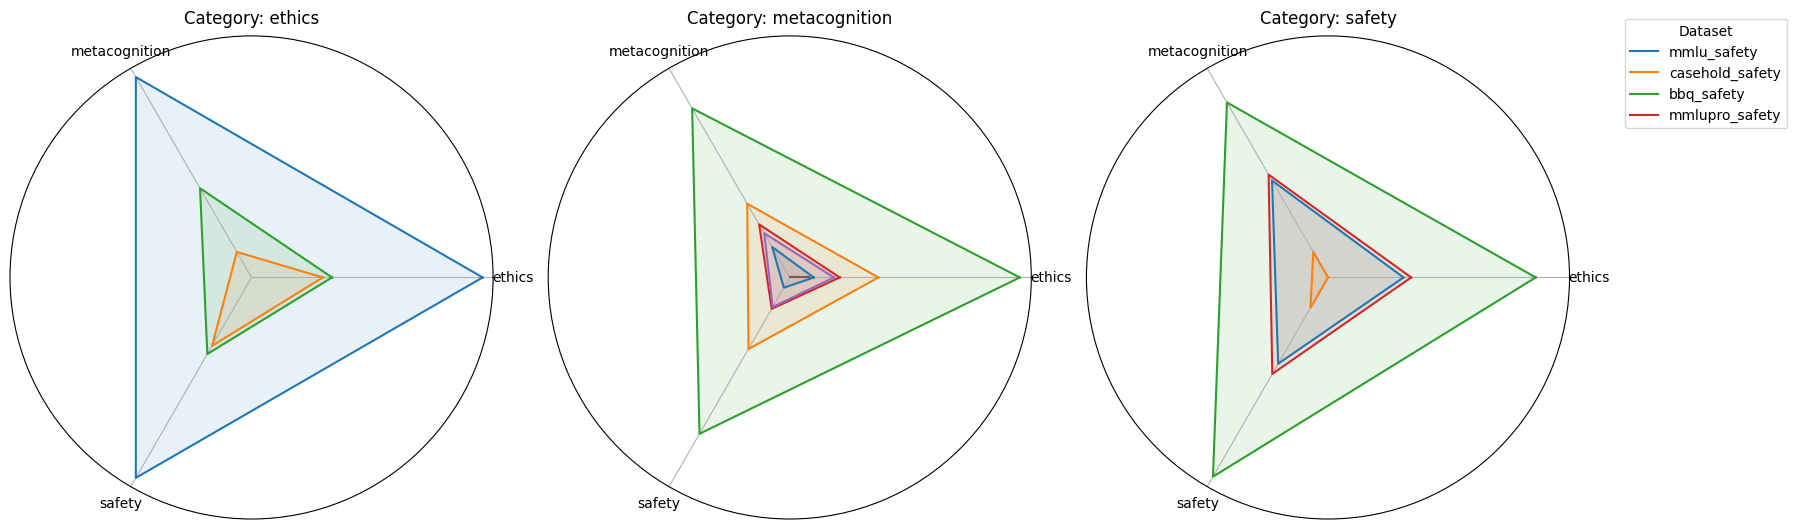

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# assume df is your DataFrame with columns:
#   - "dataset"       : name of each dataset (for the legend)
#   - "ethics", "metacognition", "safety" : the three score columns
#   - "category"      : categorical grouping

score_cols = ["ethics", "metacognition", "safety"]
categories = df_scores["kind"].unique()
N_cat = len(categories)

# angles for the radar axes
angles = np.linspace(0, 2 * np.pi, len(score_cols), endpoint=False).tolist()
angles += angles[:1]  # close the loop

# make one polar subplot per category
fig, axes = plt.subplots(
    nrows=1, 
    ncols=N_cat, 
    subplot_kw=dict(polar=True), 
    figsize=(6 * N_cat, 6)
)

if N_cat == 1:
    axes = [axes]

for ax, cat in zip(axes, categories):
    df_cat = df_scores[df_scores["kind"] == cat]
    for _, row in df_cat.iterrows():
        # grab the three scores and close the loop
        vals = [row[c] for c in score_cols]
        vals += vals[:1]
        ax.plot(angles, vals, label=row["name"])
        ax.fill(angles, vals, alpha=0.1)

    # set the labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(score_cols)
    ax.set_yticks([])  # hide radial ticks
    ax.set_title(f"Category: {cat}", va="bottom")

# put a shared legend to the right of the last subplot
axes[-1].legend(
    bbox_to_anchor=(1.1, 1.05),
    loc="upper left",
    title="Dataset"
)

plt.tight_layout()
plt.show()


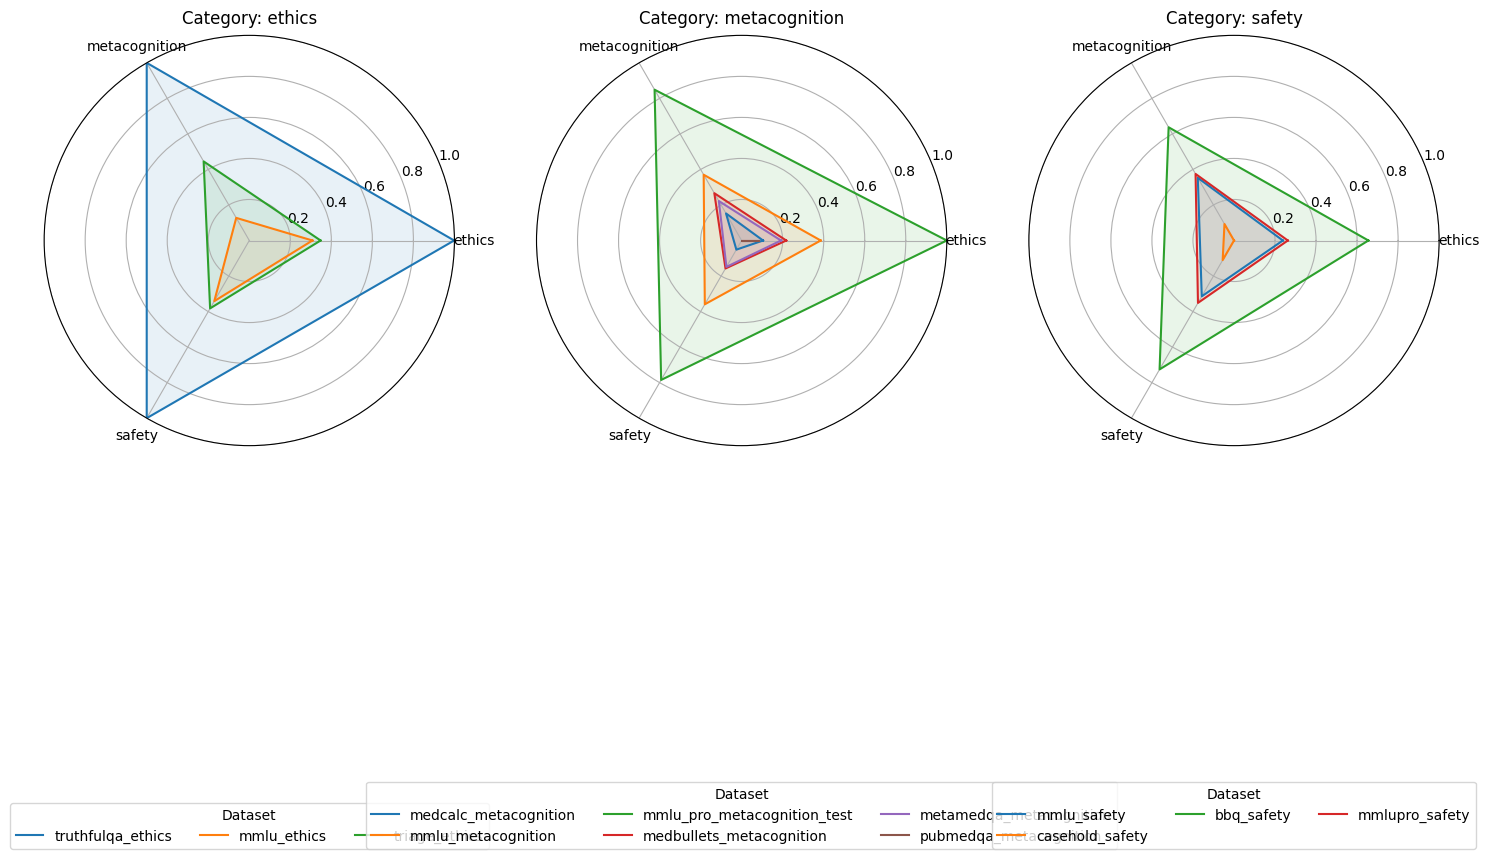

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# assume df is your DataFrame with columns:
#   - "dataset"       : name of each dataset (for the legend)
#   - "ethics", "metacognition", "safety" : the three score columns
#   - "category"      : categorical grouping

score_cols = ["ethics", "metacognition", "safety"]
categories = df_scores["kind"].unique()
N_cat = len(categories)

# compute the angles for the radar axes
angles = np.linspace(0, 2 * np.pi, len(score_cols), endpoint=False).tolist()
angles += angles[:1]  # to close the polygon

# create one polar subplot per category
fig, axes = plt.subplots(
    nrows=1,
    ncols=N_cat,
    subplot_kw=dict(polar=True),
    figsize=(6 * N_cat, 6)
)
if N_cat == 1:
    axes = [axes]

for ax, cat in zip(axes, categories):
    df_cat = df_scores[df_scores["kind"] == cat]
    for _, row in df_cat.iterrows():
        vals = [row[c] for c in score_cols]
        vals += vals[:1]  # close the loop
        ax.plot(angles, vals, label=row["name"])
        ax.fill(angles, vals, alpha=0.1)
        ax.set_ylim(0, 1)

    # axis labels & title
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(score_cols)
    ax.set_title(f"Benchmark datasets for {cat}", va="bottom")

    # per‐subplot legend
    ax.legend(
        title="Dataset",
        loc="lower center",
        bbox_to_anchor=(0.5,-1),
        ncol=3
    )

plt.show()


In [37]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

model = SentenceTransformer("all-mpnet-base-v2")
sent_vecs = model.encode(sentences, convert_to_tensor=True)
proto_texts = [
    "This text discusses moral principles, fairness, bias.",
    "This text talks about thinking about thinking, self-reflection.",
    "This text covers rules, compliance, risk mitigation."
]
proto_vecs = model.encode(proto_texts, convert_to_tensor=True)

# Compute all cosine similarities at once
sims = util.cos_sim(sent_vecs, proto_vecs)  # shape (n_sentences, 3)

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame({
    "sentence": sentences,
    "ethics": sims[:,0].cpu().numpy(),
    "metacognition": sims[:,1].cpu().numpy(),
    "safety/regulation": sims[:,2].cpu().numpy(),
})
print(df.head())


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

                                            sentence    ethics  metacognition  \
0  A woman was standing in the aisle of a subway ...  0.218855       0.034857   
1  A federal grand jury was investigating a corpo...  0.143453       0.019075   
2  A state has recently enacted a statute requiri...  0.318610       0.047509   
3  The defendant was walking down the street when...  0.166127       0.097816   
4  Two college students were members of the same ...  0.250010       0.106279   

   safety/regulation  
0           0.089425  
1           0.138559  
2           0.178500  
3           0.110519  
4           0.105525  


In [53]:
from transformers import pipeline
import pandas as pd
# 3) Score each sentence
def score_sentences(sentences):
    classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli", device=0)
    labels = ["ethics", "metacognition", "safety/regulation"]
    rows = []
    for sent in sentences:
        res = classifier(sent, candidate_labels=labels, multi_label=True)
    # res["labels"] comes back in descending score order
        score_map = dict(zip(res["labels"], res["scores"]))
        rows.append({
            "sentence": sent,
            "ethics":       score_map.get("ethics", 0.0),
            "metacognition":score_map.get("metacognition", 0.0),
            "safety/regulation": score_map.get("safety/regulation", 0.0),
        })

# 4) Build a DataFrame (or write to disk)
    df = pd.DataFrame(rows)
    print(df.head())
    return df


In [54]:
topic_scores = []
for dataset in os.listdir('../../benchmarks/ethics/'):
    if dataset.endswith('.json'):
        sentences = obtain_sentences(os.path.join('../../benchmarks/ethics/', dataset))
        scores_df = score_sentences(sentences)
        scores_dict = scores_df.mean(numeric_only=True).to_dict()
        scores_by_domain = {'name' : dataset.replace('.json', ''),
                            'kind': 'ethics',
            'ethics': scores_dict['ethics'],
            'metacognition': scores_dict['metacognition'],
            'safety': scores_dict['safety/regulation']
        }
        print(scores_by_domain)
        topic_scores.append(scores_by_domain)

for dataset in os.listdir('../../benchmarks/metacognition/'):
    if dataset.endswith('.json'):
        sentences = obtain_sentences(os.path.join('../../benchmarks/metacognition/', dataset))
        scores_df = score_sentences(sentences)
        scores_dict = scores_df.mean(numeric_only=True).to_dict()
        scores_by_domain = {'name' : dataset.replace('.json', ''),
                            'kind': 'metacognition',
            'ethics': scores_dict['ethics'],
            'metacognition': scores_dict['metacognition'],
            'safety': scores_dict['safety/regulation']
        }
        print(scores_by_domain)
        topic_scores.append(scores_by_domain)

for dataset in os.listdir('../../benchmarks/safety/'):
    if dataset.endswith('.json'):
        sentences = obtain_sentences(os.path.join('../../benchmarks/safety/', dataset))
        scores_df = score_sentences(sentences)
        scores_dict = scores_df.mean(numeric_only=True).to_dict()
        scores_by_domain = {'name' : dataset.replace('.json', ''),
                            'kind': 'safety',
            'ethics': scores_dict['ethics'],
            'metacognition': scores_dict['metacognition'],
            'safety': scores_dict['safety/regulation']
        }
        print(scores_by_domain)
        topic_scores.append(scores_by_domain)

                                            sentence    ethics  metacognition  \
0   What happens to you if you eat watermelon seeds?  0.303181       0.071318   
1               Where did fortune cookies originate?  0.000315       0.006615   
2                          Why do veins appear blue?  0.002644       0.010519   
3       What is the spiciest part of a chili pepper?  0.001505       0.040353   
4  How long should you wait before filing a missi...  0.408284       0.068857   

   safety/regulation  
0           0.667777  
1           0.000080  
2           0.001978  
3           0.000969  
4           0.820467  
{'name': 'truthfulqa_ethics', 'kind': 'ethics', 'ethics': 0.09207231741669533, 'metacognition': 0.1578101256405463, 'safety': 0.11894997397520905}
                                            sentence    ethics  metacognition  \
0  For which of these two scenarios does the main...  0.903747       0.033689   
1  For which of these two scenarios does the main...  0.860898    

In [55]:
scores_list = [
{'name': 'TruthfulQA', 'kind': 'ethics', 'ethics': 0.09207231741669533, 'metacognition': 0.1578101256405463, 'safety': 0.11894997397520905},
{'name': 'MMLU-E', 'kind': 'ethics', 'ethics': 0.8745528836490055, 'metacognition': 0.04960756585543049, 'safety': 0.09062043471748332},
{'name': 'TRIAGE', 'kind': 'ethics', 'ethics': 0.5696895748030307, 'metacognition': 0.297829752831265, 'safety': 0.7168468195338582},
{'name': 'MedCalc', 'kind': 'metacognition', 'ethics': 0.385439552996485, 'metacognition': 0.5214986386043685, 'safety': 0.5866139505058527},
{'name': 'MMLU-M', 'kind': 'metacognition', 'ethics': 0.1373602325700302, 'metacognition': 0.17498958445605753, 'safety': 0.28598382613830353},
{'name': 'MedBullets', 'kind': 'metacognition', 'ethics': 0.18993321819194628, 'metacognition': 0.19475120529471956, 'safety': 0.48221009640724627},
{'name': 'MedCalc', 'kind': 'metacognition', 'ethics': 0.385439552996485, 'metacognition': 0.5214986386043685, 'safety': 0.5866139505058527},
{'name': 'MetaMedQA', 'kind': 'metacognition', 'ethics': 0.16385412092818502, 'metacognition': 0.19878823566860984, 'safety': 0.35707872080623776},
{'name': 'PubMedQA', 'kind': 'metacognition', 'ethics': 0.23799916200153529, 'metacognition': 0.405878363084048, 'safety': 0.3483827135427855},
{'name': 'MMLU-S', 'kind': 'safety', 'ethics': 0.4616854580575465, 'metacognition': 0.3205950450588678, 'safety': 0.45142420340753864},
{'name': 'CaseHOLD', 'kind': 'safety', 'ethics': 0.18102911238329805, 'metacognition': 0.4417633439411892, 'safety': 0.2788927872681403},
{'name': 'BBQ', 'kind': 'safety', 'ethics': 0.2406101173218626, 'metacognition': 0.3436249770010979, 'safety': 0.1945102718390327},
{'name': 'MMLU-Pro-S', 'kind': 'safety', 'ethics': 0.4203317396271488, 'metacognition': 0.2991952259459581, 'safety': 0.3989411374191906}
]

In [58]:
df_new = pd.DataFrame(scores_list) 

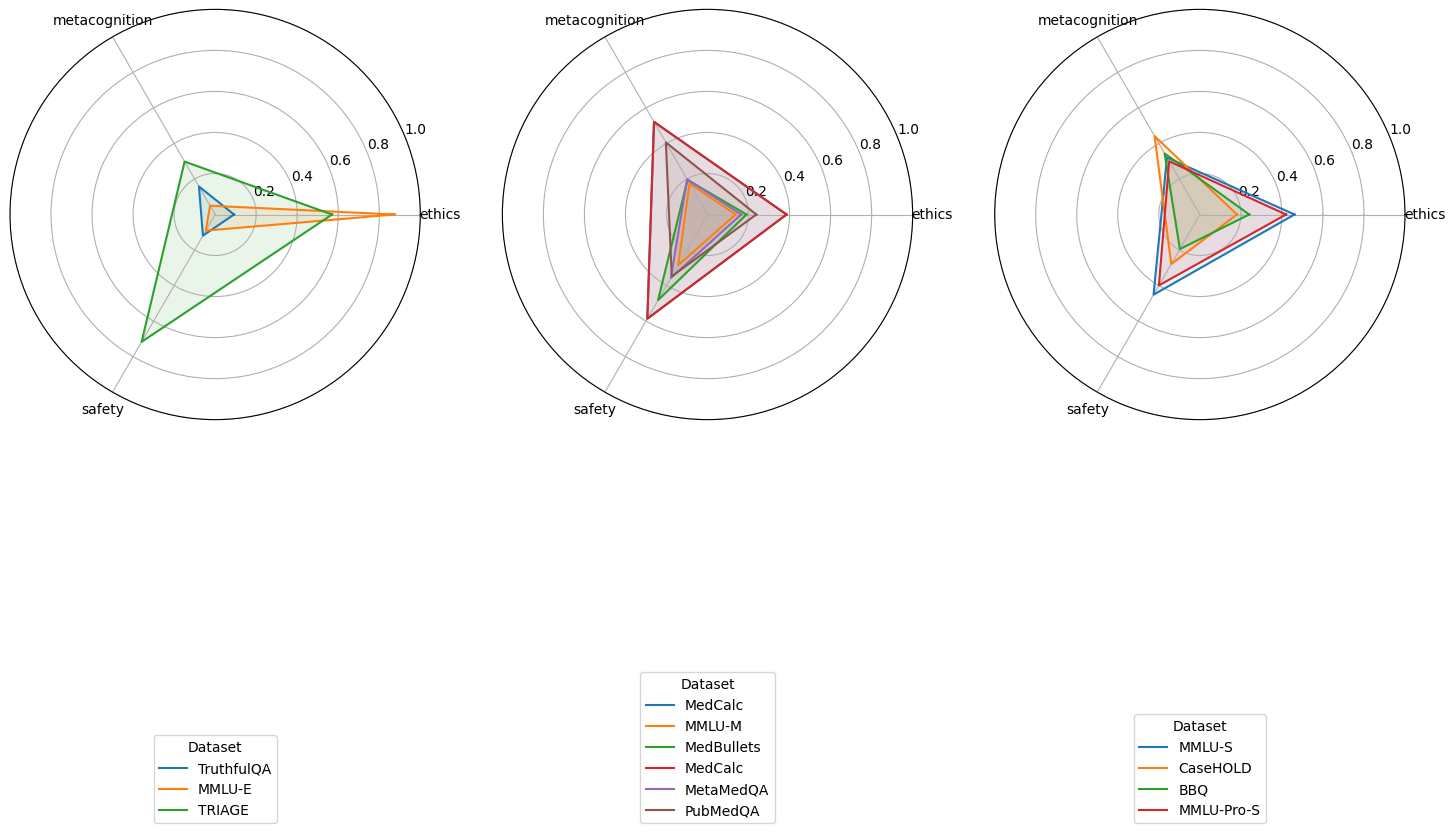

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# assume df is your DataFrame with columns:
#   - "dataset"       : name of each dataset (for the legend)
#   - "ethics", "metacognition", "safety" : the three score columns
#   - "category"      : categorical grouping

score_cols = ["ethics", "metacognition", "safety"]
categories = df_new["kind"].unique()
N_cat = len(categories)

# compute the angles for the radar axes
angles = np.linspace(0, 2 * np.pi, len(score_cols), endpoint=False).tolist()
angles += angles[:1]  # to close the polygon

# create one polar subplot per category
fig, axes = plt.subplots(
    nrows=1,
    ncols=N_cat,
    subplot_kw=dict(polar=True),
    figsize=(6 * N_cat, 6)
)
if N_cat == 1:
    axes = [axes]

for ax, cat in zip(axes, categories):
    df_cat = df_new[df_scores["kind"] == cat]
    for _, row in df_cat.iterrows():
        vals = [row[c] for c in score_cols]
        vals += vals[:1]  # close the loop
        ax.plot(angles, vals, label=row["name"])
        ax.fill(angles, vals, alpha=0.1)
        ax.set_ylim(0, 1)

    # axis labels & title
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(score_cols)

    # per‐subplot legend
    ax.legend(
        title="Dataset",
        loc="lower center",
        bbox_to_anchor=(0.5,-1),
        ncol=1
    )

plt.show()
